<a href="https://colab.research.google.com/github/nmshafie1993/Face_Mask_Detection/blob/main/Face_Mask_Detection_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing the libraries

import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [3]:
#cloning the data from github

!git clone "https://github.com/nmshafie1993/Face_Mask_Detection.git"

fatal: destination path 'Face_Mask_Detection' already exists and is not an empty directory.


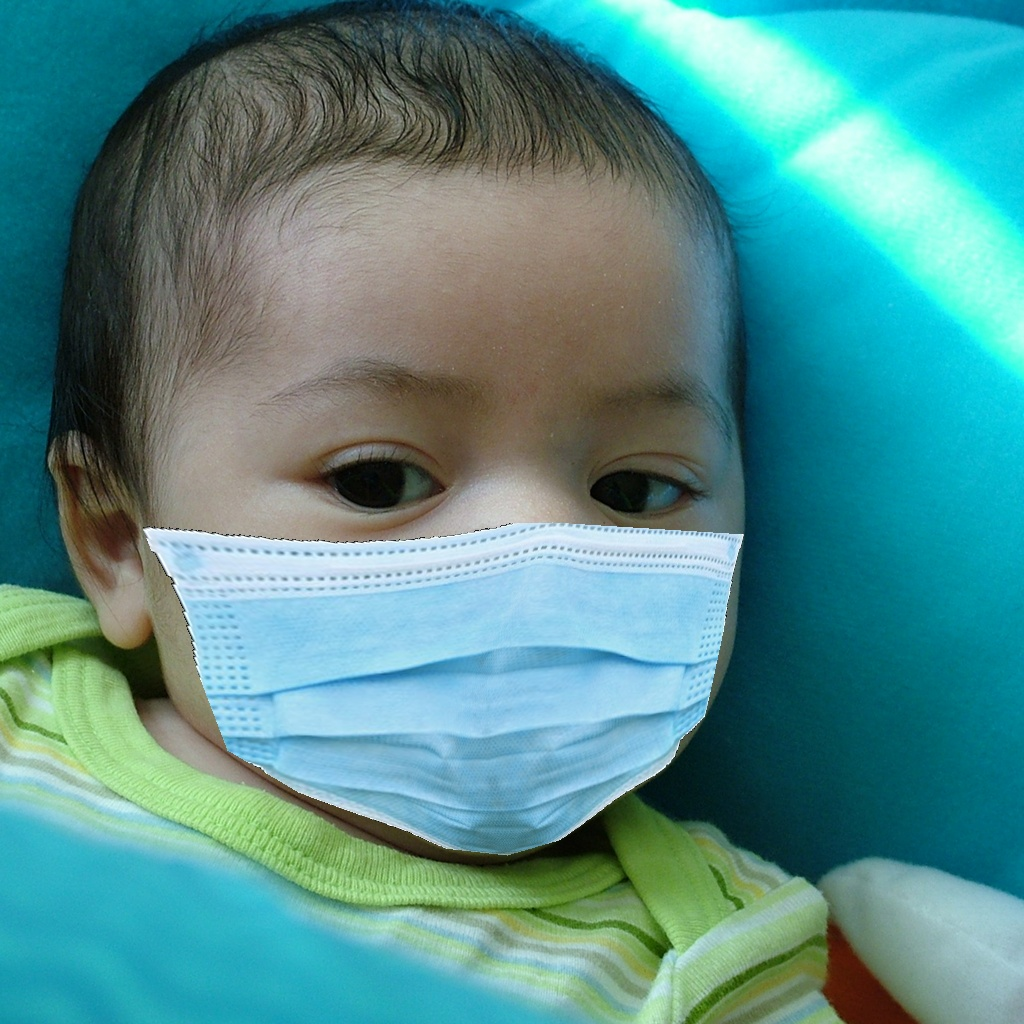

In [4]:
#displaying the first image from the directory of masks - displaying with IPython.display

Image(filename='/content/Face_Mask_Detection/data/Maks/00000_Mask.jpg', width = 224, height=224)

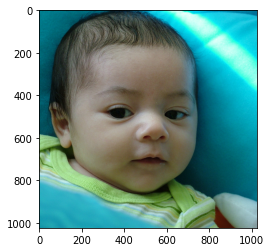

In [5]:
#displaying the first image from the directory of no masks - displaying with opencv

img_array = cv2.imread('/content/Face_Mask_Detection/data/No_Masks/00000.png')
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

In [6]:
#checking the dimensions

img_array.shape

(1024, 1024, 3)

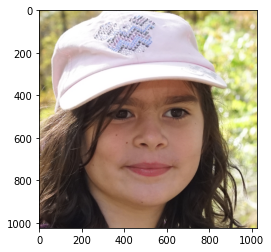

In [21]:
#resizing the image

img_size = 224 #ImageNet 224 * 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));

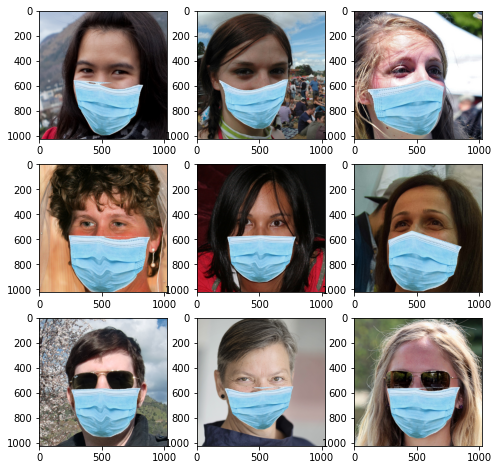

In [18]:
# Data Visulization of masks images

dataDict_Masks = '/content/Face_Mask_Detection/data/Maks'
i = 0
path = dataDict_Masks 
fig=plt.figure(figsize=(8, 8))
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

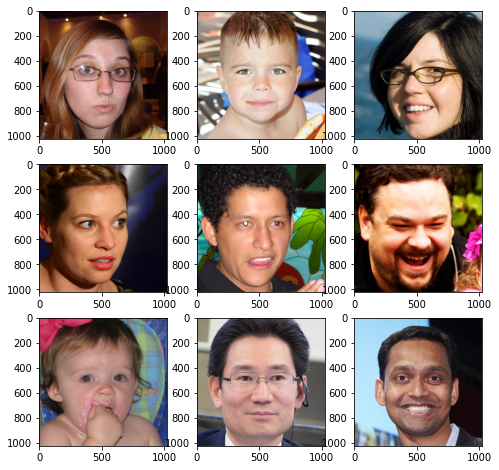

In [19]:
# Data Visulization of no masks images

dataDict_No_Masks = '/content/Face_Mask_Detection/data/No_Masks'
i = 0
path = dataDict_No_Masks
fig=plt.figure(figsize=(8, 8)) 
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

In [ ]:
dataDict = '/content/Face_Mask_Detection/data/'
categories = ['Maks', 'No_Masks']

training = []
def create_training():
  for category in categories:
    path = os.path.join(dataDict, category)
    classNum = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training.append([new_array, classNum])
      except:
        pass


In [ ]:
create_training()

In [ ]:
print(len(training))

1950


In [ ]:
import random
random.shuffle(training)

In [ ]:
X = []
y = []

for feature, label in training:
  X.append(feature)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

(1950, 224, 224, 3)

In [ ]:
X = X/225.0

In [ ]:
Y = np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].input

In [ ]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
new_model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = "accuracy")

In [ ]:
new_model.fit(X, Y, epochs = 5, validation_split=0.1)

55/55 [==============================] - 22s 223ms/step - loss: 0.0801 - accuracy: 0.9496 - val_loss: 0.0013 - val_accuracy: 1.0000


In [ ]:
new_model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('my_model.h5')

In [ ]:
frame = cv2.imread("")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
final_image = cv2.resize(frame, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255

In [ ]:
Prediction = new_model.predict(final_image)
Prediction

In [ ]:
frame = cv2.imread("")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
frame.shape

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haar_frontaalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = frame[y:y+h, x:x+w]
  cv2.rectangle(frame, (x,y), (x+h, y+h), (255,0,0), 2)
  faces = faceCascade.detectMultiScale(roi_gray)
  if len(facess) == 0:
    print("Face not Detected")
  else:
    for (ex, ey, ew, eh) in faces:
      face_roi = roi_color[ey: ey + eh, ex: ex + eh]  

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY))

In [ ]:
final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image / 255

In [ ]:
Predictions = new_model.predict(finak_image)

In [ ]:
Predictions

In [ ]:
import cv2

path = 'haar_frontaalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_white = (225, 225, 225)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in box"
#get the height and width of text
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, , thickness = 1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0, thickness = 1))

cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
  ret, frame = cap.read()
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haar_frontaalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray, 1.1, 4)
  for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+h, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not Detected")
      else:
        for (ex, ey, ew, eh) in faces:
          face_roi = roi_color[ey: ey + eh, ex: ex + eh]

    final_image = cv2.resize(frame, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0) #need fourth dimension
    final_image = final_image / 255
    font = cv2.FONT_HERSHEY_ُSIMPLEX
    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (Predictions > 0):
      status = "No Mask"

      x1, y1, w1, h1 = 0, 0, 175, 75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 +  w1, y1 + h1), (0,0,0), -1)
      #Add text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
      
    else:
      status = "Face Mask"

      x1, y1, w1, h1 = 0, 0, 175, 75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 +  w1, y1 + h1), (0,0,0), -1)

      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      cv2.putText(frame, status, (100, 150), font, 3, (0,255,0), 2, cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))

    cv2.imshow('Face Mask Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()   









In [ ]:
import winsound
frequency = 2500
duration = 1000


import cv2

path = 'haar_frontaalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
#set the rectangle background to white
rectangle_white = (225, 225, 225)
#make a black image
img = np.zeros((500, 500))
#set some text
text = "Some text in box"
#get the height and width of text
(text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, , thickness = 1)[0]
#set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0, thickness = 1))

cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError("Cannot open webcam")

while True:
  ret, frame = cap.read()
  faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haar_frontaalface_default.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray, 1.1, 4)
  for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+h, y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
      print("Face not Detected")
      else:
        for (ex, ey, ew, eh) in faces:
          face_roi = roi_color[ey: ey + eh, ex: ex + eh]

    final_image = cv2.resize(frame, (224, 224))
    final_image = np.expand_dims(final_image, axis = 0) #need fourth dimension
    final_image = final_image / 255
    font = cv2.FONT_HERSHEY_ُSIMPLEX
    Predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (Predictions > 0):
      status = "No Mask"

      x1, y1, w1, h1 = 0, 0, 175, 75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 +  w1, y1 + h1), (0,0,0), -1)
      #Add text
      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      cv2.putText(frame, status, (100, 150), font, 3, (0,0,255), 2, cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
      winsound.Beep(frequency, duration)
      
    else:
      status = "Face Mask"

      x1, y1, w1, h1 = 0, 0, 175, 75
      #Draw black background rectangle
      cv2.rectangle(frame, (x1, x1), (x1 +  w1, y1 + h1), (0,0,0), -1)

      cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
      cv2.putText(frame, status, (100, 150), font, 3, (0,255,0), 2, cv2.LINE_4)
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0))

    cv2.imshow('Face Mask Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()   